In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

What is machine learning? Where and why 
you will use machine learning? 

In [ ]:
1.What is machine learning?
Machine learning is a technique of predicting the future or classifying information to help people in
making necessary decisions.
2.Where we will use machine learning?
We use machine learning:1.Recommendation engines 2.Fraud detection 3.Prediction of equipment failures 4.Web search result 
    5.Email spam filtering
3.Why we will use machine learning?
Because it gives enterprises a view of trends in customer behavior and business operational patterns, as well as supports the 
development of new products.

What is normalization and why do you 
perform? Explain with examples. How do you  
perform it? 

What is supervised and unsupervised learning? Give some examples 

In [ ]:
Supervised learning Algorithms are trained with labeled instances, as if the desired output is known as the input. 
For example, a device can have data points marked "F" (fail) or "R" (run). The learning algorithm receives a series 
of inputs with corresponding correct outputs, and the algorithm learns to find errors by comparing the actual output 
with the correct output. Then modify the model accordingly. Through the methods of classification, regression, 
prediction, and gradient boosting, supervised learning uses patterns to predict the value of labels for additional 
unlabeled data. Supervised learning is widely used to predict possible future events using historical data. For 
example, it can predict when a credit card transaction might be fraudulent, or which insurance customer might make 
a claim.
Unsupervised learning uses opposite data without historical labels. The system will not be told the "correct answer".
The algorithm has to figure out what is being presented. The goal is to explore the data and find some internal 
structure. Unsupervised learning works well with transactional data. For example, it can identify groups of customers
with the same attributes (which can be treated the same in marketing). Or it can find the main attributes that 
differentiate the customer base from each other. Popular techniques include self-organizing maps, nearest-neighbor
mapping, k-means clustering, and singular value decomposition. These algorithms are also used to segment text topics,
recommend items, and identify data outliers.

In [2]:
#Change the path of the file location appropriately

df = pd.read_csv("WorldRecords_1.csv",encoding = 'latin')

In [5]:
'''  
Q1 print the basic information about the data set
'''
print("data shape:",df.shape)
print("data type:",type(df))
print(df.info())

data shape: (285, 7)
data type: <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Event        285 non-null    object 
 1   Type         285 non-null    object 
 2   Record       285 non-null    float64
 3   Athlete      285 non-null    object 
 4   Nationality  285 non-null    object 
 5   Location     285 non-null    object 
 6   Year         285 non-null    int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 15.7+ KB
None


In [6]:
'''
Q2 How many different types of events (e.g. “Mens 100m”, “Womens shotput” etc) are represented in the dataset
'''
print("data types of events:",df['Event'].nunique())

data types of events: 10


In [7]:
'''
Q3. In what year did Usain Bolt first break the world record for the Men’s 100m?

'''
print(df.loc[df['Athlete']=='Usain Bolt']['Year'])
print("the first break record:",'2008')

14    2008
15    2008
16    2009
Name: Year, dtype: int64
the first break record: 2008


In [8]:
'''
Q4.Create a subset of the dataset that contains only the world record cases for men’s shotput and women’s shotput

'''
df1 = df.loc[df['Event'] =='Mens Shotput']
df2 = df.loc[df['Event'] =='Womens Shotput']
subset = pd.concat([df1,df2])
print(subset)

              Event      Type  Record             Athlete Nationality  \
205    Mens Shotput  distance   17.68    Charlie Fonville         USA   
206    Mens Shotput  distance   17.79           Jim Fuchs         USA   
207    Mens Shotput  distance   17.82           Jim Fuchs         USA   
208    Mens Shotput  distance   17.90           Jim Fuchs         USA   
209    Mens Shotput  distance   17.95           Jim Fuchs         USA   
..              ...       ...     ...                 ...         ...   
280  Womens Shotput  distance   22.36     Ilona Slupianek         GDR   
281  Womens Shotput  distance   22.45     Ilona Slupianek         GDR   
282  Womens Shotput  distance   22.53  Natalya Lisovskaya         URS   
283  Womens Shotput  distance   22.60  Natalya Lisovskaya         URS   
284  Womens Shotput  distance   22.63  Natalya Lisovskaya         URS   

                  Location  Year  
205         Lawrence, U.S.  1948  
206           Oslo, Norway  1949  
207      Los Angel

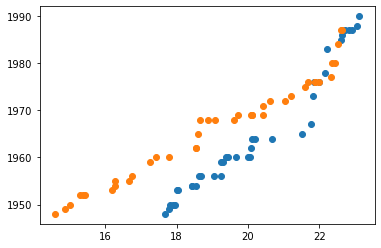

In [9]:
'''
Q5 Create a scatter plot of the year and record shotput distance one for men and one for women.

'''
df3_year = df1.loc[:,'Record']
df3_distance = df1.loc[:,'Year']
df4_year = df2.loc[:,'Record']
df4_distance = df2.loc[:,'Year']
print(plt.scatter(df3_year,df3_distance))
print(plt.scatter(df4_year,df4_distance))

In [16]:
'''
Q6 Find the average/mean  time for each event. How many athletes have time more than average in each event.
'''
df
df.groupby('Event').agg({'Record':'mean'})

,Record
Event,
Mens 100m,9.848824
Mens 800m,105.345833
Mens Mile,237.493750
Mens Polevault,5.608909
Mens Shotput,20.194872
Mens TripleJump,16.671200
Womens 100m,10.880000
Womens 800m,127.851724
Womens Mile,263.653846


In [11]:
'''
Q7 Select the athlete who took most time in men’s 100m  and women’s event.
'''
df
df5 = df.loc[df['Event'] =='Mens 100m']
df6 = df.loc[df['Event'] == 'Womens 100m']
sortA = df5.sort_values(by ='Record',ascending =False)
resultA = sortA.head(1)
print(resultA['Athlete'])
sortB = df6.sort_values(by ='Record',ascending = False)
resultB = sortB.head(1)
print(resultB['Athlete'])

0    Bob Hayes
Name: Athlete, dtype: object
17    Wyomia Tyus
Name: Athlete, dtype: object


In [12]:
'''
Q8 Which country won maximum times of men’s 100m event?

'''
df7 = df.loc[df['Event'] =="Mens 100m"]
df8 = df7.loc[:,'Nationality']
x = df8.value_counts().head(1)
print(x)

United States    11
Name: Nationality, dtype: int64


In [13]:
'''
Q9 How many athletes are there in each event?

'''
df.groupby('Event').agg({'Athlete':'count'})

,Athlete
Event,
Mens 100m,17
Mens 800m,24
Mens Mile,32
Mens Polevault,55
Mens Shotput,39
Mens TripleJump,25
Womens 100m,10
Womens 800m,29
Womens Mile,13
